In [1]:
# data link: https://www.kaggle.com/uciml/sms-spam-collection-dataset

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### 1. 데이터 전처리

In [9]:
data = pd.read_csv('spam.csv')

print('Number of samples: ', len(data))

Number of samples:  5572


In [10]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data['v1'] = data['v1'].apply(lambda x: 1 if x=='spam' else 0)

In [13]:
data

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will �_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [15]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [17]:
data.nunique()

v1       2
v2    5169
dtype: int64

In [18]:
data.drop_duplicates(subset=['v2'], inplace=True)

In [19]:
print('Number of samples: ', len(data))

Number of samples:  5169


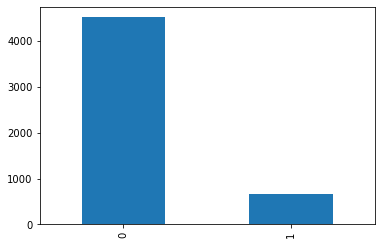

In [21]:
data['v1'].value_counts().plot(kind='bar')

In [23]:
X_data = data['v2']
y_data = data['v1']

print('메일 본문의 개수: ', len(X_data))
print('레이블의 개수: ', len(y_data))

메일 본문의 개수:  5169
레이블의 개수:  5169


In [26]:
# 토크나이저로 sequences 변환
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data)
sequences = tokenizer.texts_to_sequences(X_data)

In [28]:
sequences[:5]

[[47,
  433,
  4011,
  779,
  705,
  662,
  64,
  8,
  1201,
  94,
  121,
  434,
  1202,
  142,
  2710,
  1203,
  68,
  57,
  4012,
  137],
 [49, 306, 1363, 435, 6, 1766],
 [53,
  537,
  8,
  20,
  4,
  1016,
  933,
  2,
  221,
  2711,
  1364,
  706,
  2712,
  2713,
  267,
  2714,
  70,
  2711,
  2,
  2715,
  2,
  359,
  537,
  604,
  1204,
  82,
  436,
  186,
  707,
  437,
  4013],
 [6, 227, 152, 23, 347, 2716, 6, 138, 145, 56, 152],
 [934, 1, 97, 96, 69, 453, 2, 876, 69, 1767, 199, 105, 438]]

In [29]:
# word_index : 단어 인덱스
word_to_index= tokenizer.word_index
print(word_to_index)

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'my': 11, 'for': 12, 'your': 13, 'it': 14, 'of': 15, 'have': 16, 'call': 17, 'that': 18, 'on': 19, '2': 20, 'are': 21, 'now': 22, 'so': 23, 'but': 24, 'not': 25, 'can': 26, 'at': 27, 'or': 28, "i'm": 29, 'do': 30, 'be': 31, 'get': 32, 'will': 33, 'just': 34, 'if': 35, 'with': 36, 'we': 37, 'no': 38, 'this': 39, 'ur': 40, 'up': 41, 'gt': 42, 'lt': 43, '4': 44, 'how': 45, 'when': 46, 'go': 47, 'from': 48, 'ok': 49, 'out': 50, 'all': 51, 'what': 52, 'free': 53, 'know': 54, 'like': 55, 'then': 56, 'got': 57, 'good': 58, 'come': 59, 'am': 60, 'was': 61, 'time': 62, 'its': 63, 'only': 64, 'day': 65, 'want': 66, 'love': 67, 'there': 68, 'he': 69, 'text': 70, 'send': 71, 'going': 72, 'one': 73, 'need': 74, 'by': 75, 'lor': 76, 'home': 77, 'as': 78, 'about': 79, 'still': 80, 'see': 81, 'txt': 82, 'back': 83, 'r': 84, 'stop': 85, 'da': 86, 'k': 87, 'today': 88, 'our': 89, "i'll": 90, 'dont': 91, 'reply': 

In [33]:
# 각 단어 등장 빈도수
threshold = 2
total_cnt = len(word_to_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value
    
    if value < threshold:
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value
        
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 4906
단어 집합(vocabulary)에서 희귀 단어의 비율: 55.02467474203678
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.080059486925269


In [34]:
# 단어 집합 크기 : vocab_size
# 주의! 패딩을 위한 토큰인 0번 단어를 고려하여 +1을 해서 저장해주어여 한다.
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: ', vocab_size)

단어 집합의 크기:  8917


In [35]:
n_of_train = int(len(sequences) * 0.8)
n_of_test = int(len(sequences) - n_of_train)
print('훈련 데이터의 개수 :', n_of_train)
print('테스트 데이터의 개수:', n_of_test)

훈련 데이터의 개수 : 4135
테스트 데이터의 개수: 1034


메일의 최대 길이:  189
메일의 평균 길이:  15.610369510543626


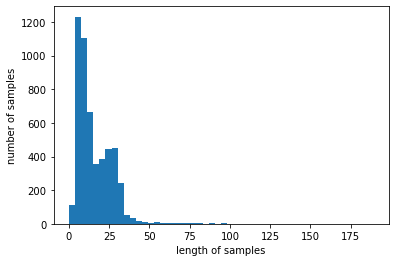

In [40]:
X_data = sequences
print('메일의 최대 길이: ', max(len(l) for l in X_data))
print('메일의 평균 길이: ', (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [42]:
max_len = 189
data = pad_sequences(X_data, maxlen=max_len)
print('훈련 데이터 크기: ', data.shape)

훈련 데이터 크기:  (5169, 189)


In [49]:
X_train = data[:n_of_train]
y_train = np.array(y_data[:n_of_train])

X_test = data[n_of_train:]
y_test = np.array(y_data[n_of_train:])

### 2. RNN으로 스팸 메일 분류하기

In [66]:
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_size, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
52/52 [==============================] - 2s 34ms/step - loss: 0.4126 - accuracy: 0.8519 - val_loss: 0.2923 - val_accuracy: 0.8755
Epoch 2/10
52/52 [==============================] - 2s 31ms/step - loss: 0.1378 - accuracy: 0.9652 - val_loss: 0.1356 - val_accuracy: 0.9528
Epoch 3/10
52/52 [==============================] - 2s 36ms/step - loss: 0.0705 - accuracy: 0.9840 - val_loss: 0.0752 - val_accuracy: 0.9782
Epoch 4/10
52/52 [==============================] - 2s 33ms/step - loss: 0.0439 - accuracy: 0.9897 - val_loss: 0.0617 - val_accuracy: 0.9831
Epoch 5/10
52/52 [==============================] - 2s 32ms/step - loss: 0.0268 - accuracy: 0.9955 - val_loss: 0.0621 - val_accuracy: 0.9831
Epoch 6/10
52/52 [==============================] - 2s 33ms/step - loss: 0.0154 - accuracy: 0.9976 - val_loss: 0.0543 - val_accuracy: 0.9843
Epoch 7/10
52/52 [==============================] - 2s 34ms/step - loss: 0.0084 - accuracy: 0.9991 - val_loss: 0.0672 - val_accuracy: 0.9819
Epoch 8/10
52

In [67]:
print(f'테스트 정확도: {model.evaluate(X_test, y_test)[1]:.4f}')

33/33 [==============================] - 0s 5ms/step - loss: 0.0736 - accuracy: 0.9778
테스트 정확도: 0.9778


In [68]:
history.history

{'loss': [0.41258421540260315,
  0.13780586421489716,
  0.0705377534031868,
  0.04385780543088913,
  0.026836104691028595,
  0.015374532900750637,
  0.008358469232916832,
  0.004897597711533308,
  0.0058832173235714436,
  0.024661947041749954],
 'accuracy': [0.8518742322921753,
  0.9652357697486877,
  0.9839782118797302,
  0.9897218942642212,
  0.9954655170440674,
  0.9975816011428833,
  0.9990931153297424,
  1.0,
  0.9996976852416992,
  0.993954062461853],
 'val_loss': [0.2923039197921753,
  0.1355867236852646,
  0.07523147761821747,
  0.06169896572828293,
  0.06208474561572075,
  0.05433792248368263,
  0.06724931299686432,
  0.08012422174215317,
  0.06872355192899704,
  0.0709252655506134],
 'val_accuracy': [0.8754534721374512,
  0.952841579914093,
  0.978234589099884,
  0.9830713272094727,
  0.9830713272094727,
  0.984280526638031,
  0.9818621277809143,
  0.9794437885284424,
  0.9830713272094727,
  0.9794437885284424]}

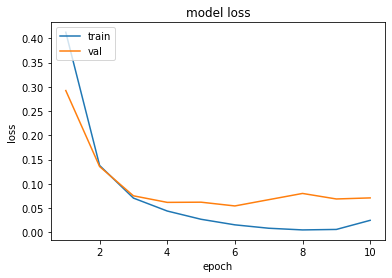

In [71]:
# epoch가 5를 넘어가면 검증 데이터의 오차가 증가한다. 과적합 때문.
# 따라서 3~4 의 epoch이 가장 적당하다.
epochs = range(1, len(history.history['loss'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()